# TASK-4
**Analyze and visualize sentiment patterns in social media data to understand public opinion and attitudes towards specific topics or brands.**

In [2]:
#importing the necessary libraries
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm

In [3]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import re
from collections import Counter
from string import punctuation

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import precision_score, recall_score , f1_score, accuracy_score,confusion_matrix

In [5]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [6]:
from gensim.models import Word2Vec
import torch
import torch.nn as nn
from torch.optim import Adam
!pip install torchmetrics
from torch.utils.data import DataLoader , TensorDataset
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

lemma = WordNetLemmatizer()
lb = LabelEncoder()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 841.5/841.5 kB 7.5 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-many

In [7]:
from google.colab import files
uploaded = files.upload()

Saving twitter_training.csv.zip to twitter_training.csv.zip


In [9]:
#Loading the train data
df = pd.read_csv("twitter_training.csv.zip")

In [10]:
#viewing first few rows
df.head()

,2401,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...


In [11]:
np.unique(df['Borderlands'])

array(['Amazon', 'ApexLegends', 'AssassinsCreed', 'Battlefield',
       'Borderlands', 'CS-GO', 'CallOfDuty', 'CallOfDutyBlackopsColdWar',
       'Cyberpunk2077', 'Dota2', 'FIFA', 'Facebook', 'Fortnite', 'Google',
       'GrandTheftAuto(GTA)', 'Hearthstone', 'HomeDepot',
       'LeagueOfLegends', 'MaddenNFL', 'Microsoft', 'NBA2K', 'Nvidia',
       'Overwatch', 'PlayStation5(PS5)',
       'PlayerUnknownsBattlegrounds(PUBG)', 'RedDeadRedemption(RDR)',
       'TomClancysGhostRecon', 'TomClancysRainbowSix', 'Verizon',
       'WorldOfCraft', 'Xbox(Xseries)', 'johnson&johnson'], dtype=object)

In [12]:
np.unique(df['Positive'])

array(['Irrelevant', 'Negative', 'Neutral', 'Positive'], dtype=object)

In [13]:
df = df.drop('2401',axis=1)

In [14]:
df.head()

,Borderlands,Positive,"im getting on borderlands and i will murder you all ,"
0,Borderlands,Positive,I am coming to the borders and I will kill you...
1,Borderlands,Positive,im getting on borderlands and i will kill you ...
2,Borderlands,Positive,im coming on borderlands and i will murder you...
3,Borderlands,Positive,im getting on borderlands 2 and i will murder ...
4,Borderlands,Positive,im getting into borderlands and i can murder y...


In [15]:
df= df.rename(columns={"Borderlands":"Feature2","im getting on borderlands and i will murder you all ,":"Feature1","Positive": "labels"})

In [16]:
df["tweets"]= df["Feature1"].astype(str) +" "+ df["Feature2"].astype(str)
df= df.drop(["Feature1","Feature2"],axis=1)

In [17]:
df_labels = {key : value for value , key in enumerate(np.unique(df['labels']))}
df_labels

{'Irrelevant': 0, 'Negative': 1, 'Neutral': 2, 'Positive': 3}

In [18]:
def getlabel(n) :
    for x , y in df_labels.items() :
        if y==n :
            return x

## Performing Exploratory Data Analysis

object
['Positive' 'Neutral' 'Negative' 'Irrelevant']


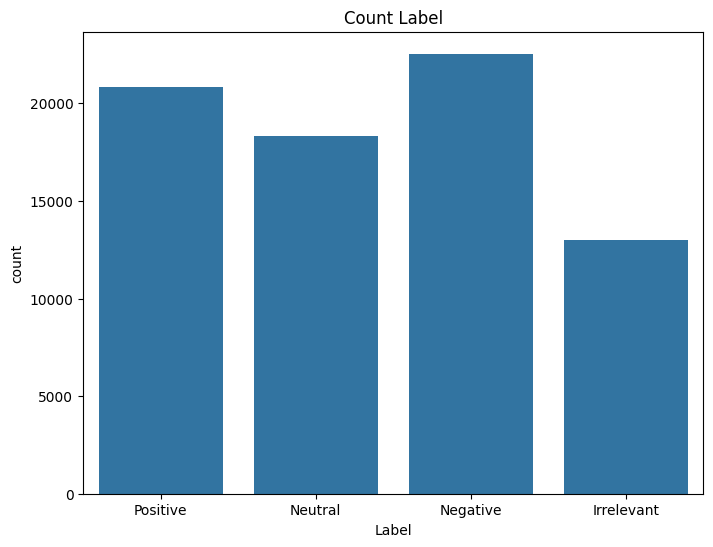

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Check data types and unique values
print(df['labels'].dtype)
print(df['labels'].unique())

# Create a count plot
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='labels')
plt.title('Count Label')
plt.xlabel('Label')
plt.show()

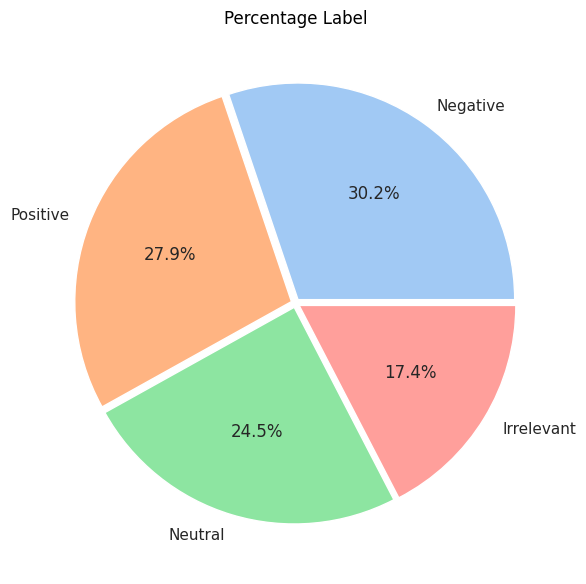

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

label_count = df['labels'].value_counts()
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 6))

sns.set_theme(style='darkgrid', palette='pastel')
color = sns.color_palette(palette='pastel')
explode = [0.02] * len(label_count)

axes.pie(label_count.values, labels=label_count.index, autopct='%1.1f%%', colors=color, explode=explode)
axes.set_title('Percentage Label')

plt.tight_layout()
plt.show()

In [21]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


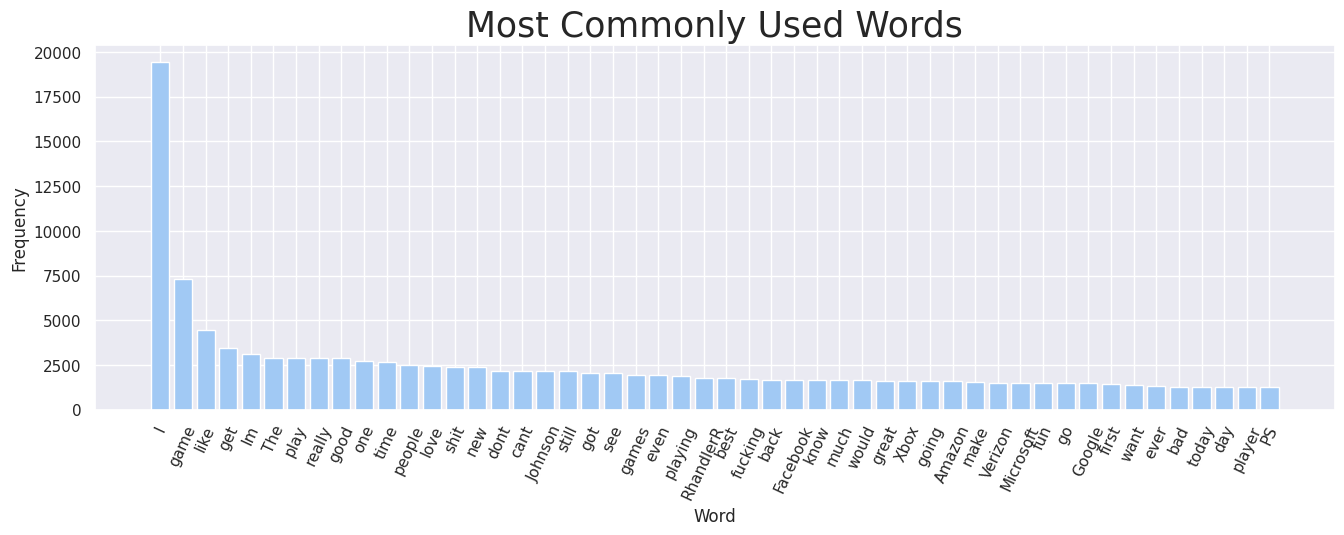

In [22]:
import re
import nltk
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from string import punctuation
from collections import Counter

# Download the 'stopwords' resource
nltk.download('stopwords')

def Most_Words_used(tweets, num_of_words):
    all_text = ''.join(df[tweets].values)

    all_text = re.sub('<.*?>', '', all_text)  # HTML tags
    all_text = re.sub(r'\d+', '', all_text)  # numbers
    all_text = re.sub(r'[^\w\s]', '', all_text)  # special characters
    all_text = re.sub(r'http\S+', '', all_text)  # URLs or web links
    all_text = re.sub(r'@\S+', '', all_text)  # mentions
    all_text = re.sub(r'#\S+', '', all_text)  # hashtags

    words = all_text.split()

    # remove puncs
    punc = list(punctuation)
    words = [word for word in words if word not in punc]

    # remove stopwords (now that 'stopwords' is downloaded)
    stop_words = set(stopwords.words('english'))
    words = [word for word in words if not word in stop_words]

    word_counts = Counter(words)
    top_words = word_counts.most_common(num_of_words)

    return top_words

top_words = Most_Words_used('tweets', 50)

xaxis = [word[0] for word in top_words]
yaxis = [word[1] for word in top_words]

plt.figure(figsize=(16, 5))
plt.bar(xaxis, yaxis)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words', fontsize=25)
plt.xticks(rotation=65)
plt.subplots_adjust(bottom=0.15)
plt.show()

# Data Processing

In [23]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [24]:
import nltk.data

print(nltk.data.path)

['/root/nltk_data', '/usr/nltk_data', '/usr/share/nltk_data', '/usr/lib/nltk_data', '/usr/share/nltk_data', '/usr/local/share/nltk_data', '/usr/lib/nltk_data', '/usr/local/lib/nltk_data']


In [25]:

import nltk
import pandas as pd

# Specify the data directory explicitly
nltk.data.path.append("C:\\Users\\Angela/nltk_data")

# Download the 'punkt' and 'wordnet' resources if not already downloaded
nltk.download('punkt')
nltk.download('wordnet')

# Define your DataPrep function
def DataPrep(text):
    # Your existing code for text preprocessing here

    # Tokenization
    tokens = nltk.word_tokenize(text)

    # Remove punctuation, stopwords, and perform lemmatization (assuming 'lemma' is defined)
    stop_words = set(nltk.corpus.stopwords.words('english'))
    words = [word.lower() for word in tokens if word.isalpha() and word.lower() not in stop_words]
    words = [lemma.lemmatize(word) for word in words]

    # Join the cleaned words back into a text
    cleaned_text = ' '.join(words)

    return cleaned_text

# Assuming you have a DataFrame 'df' with a 'tweets' column
df['cleaned_tweets'] = df['tweets'].apply(DataPrep)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...


In [26]:
print(f'There are around {int(df["cleaned_tweets"].duplicated().sum())} duplicated tweets, we will remove them.')

There are around 13946 duplicated tweets, we will remove them.


In [27]:
df.drop_duplicates("cleaned_tweets", inplace=True)

In [28]:
df['tweet_len'] = [len(text.split()) for text in df.cleaned_tweets]

In [29]:
df = df[df['tweet_len'] < df['tweet_len'].quantile(0.995)]

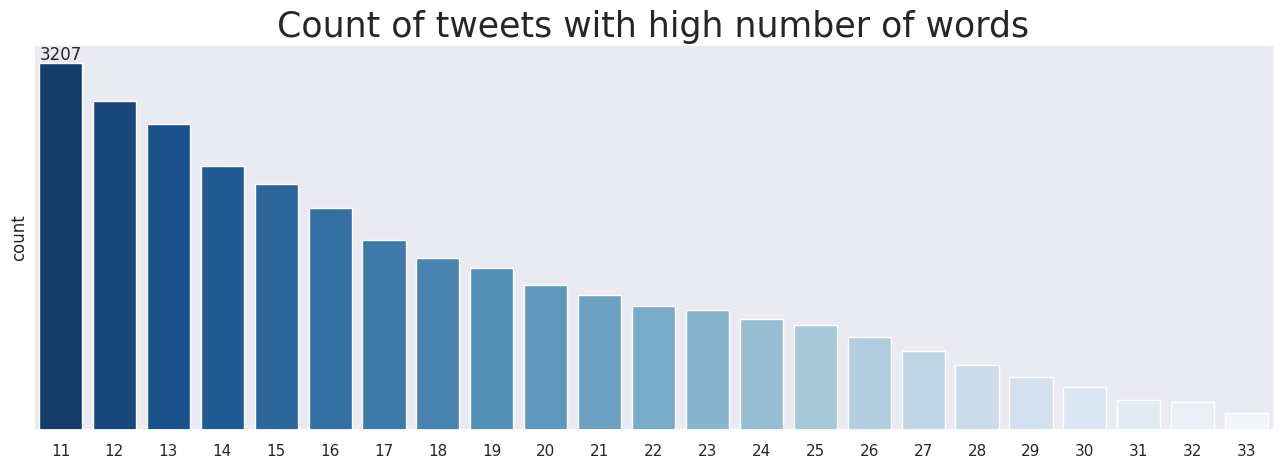

In [30]:
plt.figure(figsize=(16,5))
ax = sns.countplot(x='tweet_len', data=df[(df['tweet_len']<=1000) & (df['tweet_len']>10)], palette='Blues_r')
plt.title('Count of tweets with high number of words', fontsize=25)
plt.yticks([])
ax.bar_label(ax.containers[0])
plt.ylabel('count')
plt.xlabel('')
plt.show()

# Split the Data

In [31]:
from sklearn.model_selection import train_test_split

# Split your data into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(df['cleaned_tweets'], df['labels'], train_size=0.85, random_state=42)

In [32]:
len(x_train) ,len(x_val)

(51290, 9052)

# Feature Extraction

In [33]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer()
vec.fit(x_train)

# Get the feature names
feature_names = vec.get_feature_names_out()

print("No. of feature words: ", len(feature_names))

No. of feature words:  22361


In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np  # Import NumPy if not already imported

# Convert your text data to lowercase before vectorization
x_train = [text.lower() for text in x_train]

# Create a TfidfVectorizer
vec = TfidfVectorizer()

# Transform the lowercase text data
x_train = vec.fit_transform(x_train)  # Keep it as a sparse matrix

# Transform the validation data in the same way
x_val = [text.lower() for text in x_val]
x_val = vec.transform(x_val)

# Encoding

In [35]:
y_train = lb.fit_transform(y_train)
y_val = lb.fit_transform(y_val)

# Logistic Regression

In [36]:
# Performing logistic Regression
from sklearn.linear_model import LogisticRegression

# Create an instance of the LogisticRegression model
lr = LogisticRegression(random_state=42)

# Fit the model to your training data
lr.fit(x_train, y_train)

LogisticRegression(random_state=42)

In [37]:
lr = LogisticRegression(random_state=42)
lr.fit(x_train , y_train)

LogisticRegression(random_state=42)

In [38]:
train_acc1 = lr.score(x_train , y_train)

In [39]:
lr_pred = lr.predict(x_val)

val_acc1 = accuracy_score(y_val , lr_pred)

val_precision1 = precision_score(y_val , lr_pred , average='weighted')
val_recall1 = recall_score(y_val , lr_pred , average='weighted')
val_f1score1 = f1_score(y_val , lr_pred , average='weighted')

In [40]:
print(f"The training accuracy for logistic regression : {(train_acc1*100):0.2f}%\n")
print(f"The validation accuracy for logistic regression : {(val_acc1*100):0.2f}%\n")
print(f"The precision for logistic regression : {val_precision1:0.2f}\n")
print(f"The recall for logistic regression : {val_recall1:0.2f}\n")
print(f"The f1 score for logistic regression : {val_f1score1:0.2f}\n")

The training accuracy for logistic regression : 82.57%

The validation accuracy for logistic regression : 74.93%

The precision for logistic regression : 0.75

The recall for logistic regression : 0.75

The f1 score for logistic regression : 0.75



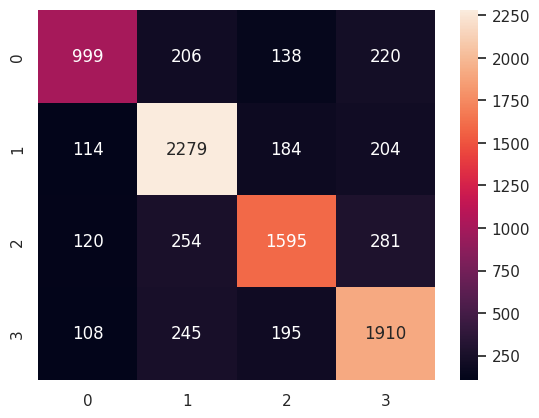

In [41]:
lr_cm = confusion_matrix(y_val , lr_pred)
sns.heatmap(lr_cm, annot=True,fmt='3g')
plt.show()

# LSTM - Long short-term Memory Networks

In [47]:
MAX_LEN = np.max(df['tweet_len'])
MAX_LEN

33

In [48]:
def lstm_prep(column , seq_len) :
    # create a vocab of words
    corpus = [word for text in column for word in text.split()]
    words_count = Counter(corpus)
    sorted_words = words_count.most_common()
    vocab_to_int = {w:i+1 for i , (w,c) in enumerate(sorted_words)}

    text_int = []

    for text in column :
        token = [vocab_to_int[word] for word in text.split()]
        text_int.append(token)


    # padding
    features = np.zeros((len(text_int) , seq_len) , dtype = int)
    for idx , y in tqdm(enumerate(text_int)) :
        if len(y) <= seq_len :
            zeros = list(np.zeros(seq_len - len(y)))
            new = zeros + y

        else :
            new = y[:seq_len]

        features[idx,:] = np.array(new)

    return sorted_words, features
VOCAB , tokenized_column = lstm_prep(df['cleaned_tweets'] , MAX_LEN)

0it [00:00, ?it/s]

In [49]:
VOCAB[:10]

[('game', 9398),
 ('johnson', 6619),
 ('like', 4491),
 ('get', 3983),
 ('facebook', 3846),
 ('xbox', 3756),
 ('google', 3756),
 ('microsoft', 3744),
 ('verizon', 3697),
 ('amazon', 3695)]

In [50]:
len(VOCAB)

23350

In [51]:
tokenized_column.shape

(60342, 33)

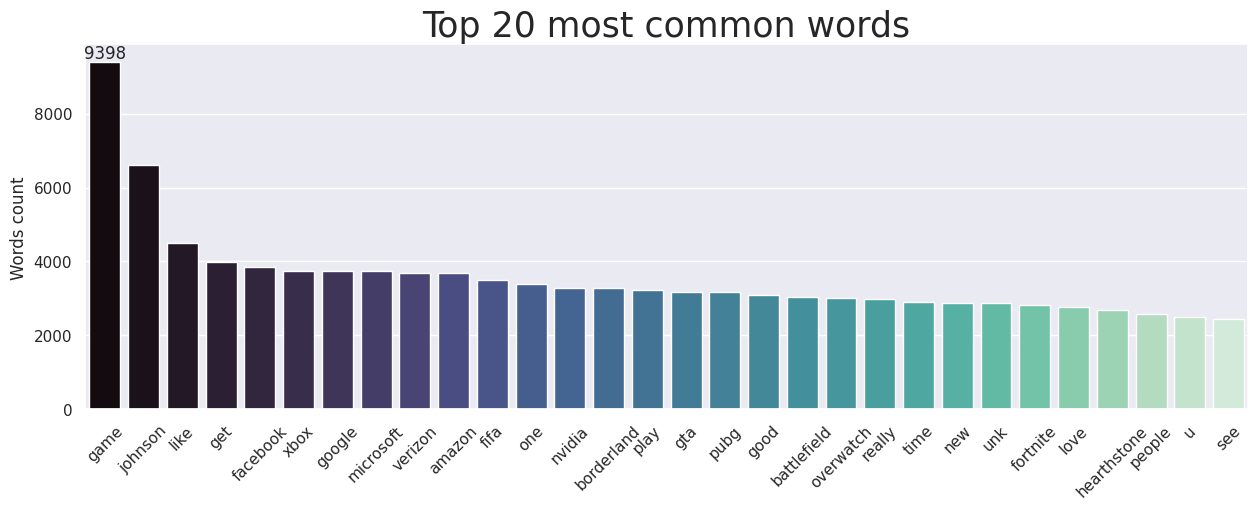

In [52]:
def most_common_words(vocab):
    keys = []
    values = []

    # Unpack the keys and values from the vocab list of tuples
    for key, value in vocab[:30]:
        keys.append(key)
        values.append(value)

    plt.figure(figsize=(15, 5))
    ax = sns.barplot(x=keys, y=values, palette='mako')
    plt.title('Top 20 most common words', size=25)
    ax.bar_label(ax.containers[0])
    plt.ylabel("Words count")
    plt.xticks(rotation=45)
    plt.subplots_adjust(bottom=0.15)
    plt.show()

most_common_words(VOCAB)

In [53]:
X = tokenized_column
y = lb.fit_transform(df['labels'].values)
X_train , X_val , Y_train , Y_val = train_test_split(X , y , train_size=0.85 , random_state=42)
train_data = TensorDataset(torch.from_numpy(X_train), torch.LongTensor(Y_train))
val_data = TensorDataset(torch.from_numpy(X_val), torch.LongTensor(Y_val))
BATCH_SIZE = 64
torch.manual_seed(42)
train_dataloader = DataLoader(
    dataset = train_data ,
    batch_size=BATCH_SIZE ,
    shuffle=True
)
torch.manual_seed(42)
val_dataloader = DataLoader(
    dataset = val_data ,
    batch_size = BATCH_SIZE ,
    shuffle=False
)
print(f"the size of the train dataloader {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"the size of the validation dataloader {len(val_dataloader)} batches of {BATCH_SIZE}")
EMBEDDING_DIM = 200
Word2vec_train_data = list(map(lambda x: x.split(), df['cleaned_tweets']))
word2vec_model = Word2Vec(Word2vec_train_data, vector_size=EMBEDDING_DIM)
def weight_matrix(model,vocab):
    vocab_size= len(vocab)+1
    embedding_matrix = np.zeros((vocab_size,EMBEDDING_DIM))
    for word, token in vocab:
        if model.wv.__contains__(word):
            embedding_matrix[token]=model.wv.__getitem__(word)
    return embedding_matrix
embedding_vec = weight_matrix(word2vec_model,VOCAB)
print("Embedding Matrix Shape:", embedding_vec.shape)

the size of the train dataloader 802 batches of 64
the size of the validation dataloader 142 batches of 64
Embedding Matrix Shape: (23351, 200)


In [54]:
class LSTM(nn.Module):
    def __init__(self, vocab_size, embedding_dim, num_layers, hidden_dim, out_channels, bidirectional):
        super().__init__()

        self.no_layers = num_layers
        self.hidden_dim = hidden_dim
        self.out_channels = out_channels
        self.num_directions = 2 if bidirectional else 1
        self.embedding = nn.Embedding(vocab_size, embedding_dim)

        self.lstm = nn.LSTM(
            embedding_dim,
            hidden_dim,
            num_layers,
            dropout=0.5,
            bidirectional=bidirectional,
            batch_first=True
        )

        self.fc = nn.Linear(hidden_dim * self.num_directions, out_channels)

    def forward(self, x):
        h0 = torch.zeros((self.no_layers * self.num_directions, x.size(0), self.hidden_dim))
        c0 = torch.zeros((self.no_layers * self.num_directions, x.size(0), self.hidden_dim))

        embedded = self.embedding(x)

        out, _ = self.lstm(embedded, (h0, c0))

        out = out[:, -1, :]

        out = self.fc(out)

        return out

In [71]:
# define parameters
VOCAB_SIZE = len(VOCAB) + 1
NUM_LAYERS = 2
OUT_CHANNELS = 4
HIDDEN_DIM = 256
BIDIRECTIONAL = True

model = LSTM(VOCAB_SIZE , EMBEDDING_DIM , NUM_LAYERS , HIDDEN_DIM , OUT_CHANNELS , BIDIRECTIONAL)

model.embedding.weight.data.copy_(torch.from_numpy(embedding_vec))

model.embedding.weight.requires_grad = True

plt.plot(range(epochs),training_loss,color="blue",label="Loss")
plt.plot(range(epochs),training_acc,color="green",label="Accuracy")
plt.xlabel('Epochs')
plt.ylabel('Accuracy / Loss')
plt.legend()
plt.show()

In [59]:
val_loss=0
val_acc3= 0
lstm_preds=[]
val_targets = []
torch.manual_seed(42)
with torch.no_grad() :
        for x_val , y_val in tqdm(val_dataloader) :
            y_pred=model.forward(x_val)
            val_pred = torch.softmax(y_pred , dim=1 ).argmax(dim=1)
            lstm_preds.append(val_pred)
            val_targets.extend(y_val)

            loss=criterion(y_pred,y_val)
            val_loss+=loss
            val_acc3 += accuracy_score(y_val , y_pred.argmax(dim=1))


val_loss/=len(val_dataloader)
val_acc3/=len(val_dataloader)
lstm_preds = torch.cat(lstm_preds)
val_targets = torch.Tensor(val_targets)

  0%|          | 0/142 [00:00<?, ?it/s]

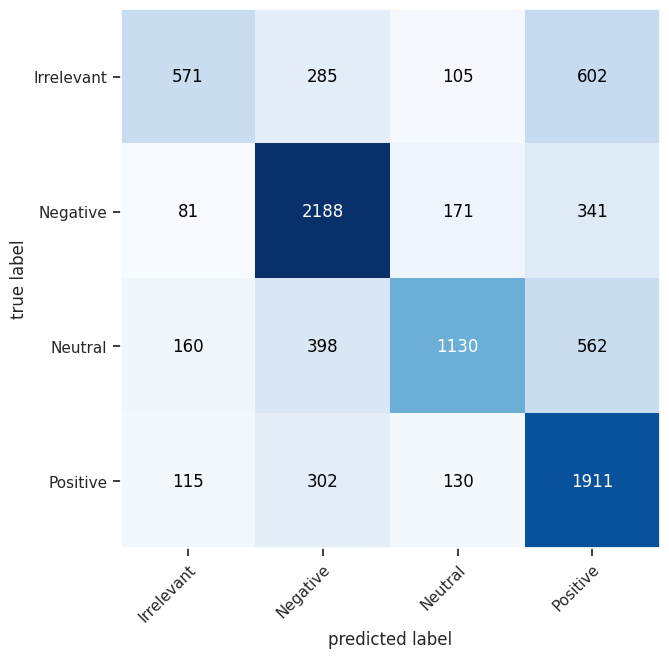

In [62]:
confmat = ConfusionMatrix(num_classes=4, task='multiclass')
confmat_tensor = confmat(preds=lstm_preds,
                         target=val_targets)

fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=df_labels.keys(),
    figsize=(10, 7)
)